# To explore Supervised Machine Learning

## Linear Regression

In [57]:
# import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# to visualise complete data frame
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [59]:
# reading csv file
data=pd.read_csv('http://bit.ly/w-data')
print('Out data has been loaded...')

Out data has been loaded...


In [60]:
# creating copy of our data
df=data.copy()

In [61]:
# viewing our data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Our data has two columns 'Hours' and 'Scores' where 'Hours' is independent feature and 'Scores' is dependent/target feature

In [62]:
# shape of our data
df.shape

(25, 2)

#### Analysing our data

Text(0.5, 1.0, 'Hours v/s Scores')

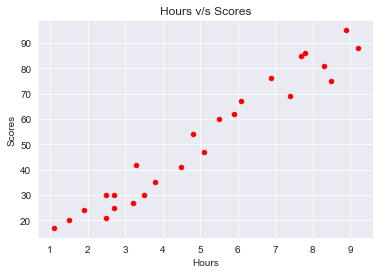

In [177]:
sns.set_style('darkgrid')
plt.scatter(x='Hours',y='Scores', data=df, c='red', s=20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours v/s Scores')

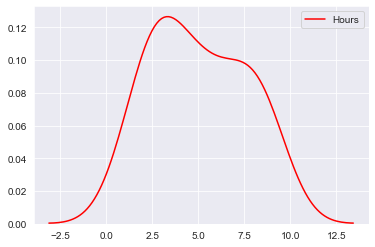

In [64]:
sns.kdeplot(df['Hours'], color='red')

Since, our data is following linear relation between dependent and independent features Therefore it doesn't need any transformation

### Spliting data into train-test

In [145]:
X=np.array(df['Hours']).reshape(-1,1)
Y=np.array(df['Scores']).reshape(-1,1)

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=101)

In [152]:
print(f'Shape of x_train {x_train.shape}')
print(f'Shape of x_test {x_test.shape}')
print(f'Shape of y_train {y_test.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of x_train (20, 1)
Shape of x_test (5, 1)
Shape of y_train (5, 1)
Shape of y_test (5, 1)


## Scaling features 

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaling=StandardScaler()

In [155]:
X_train=np.array(x_train).reshape(-1,1)
Y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(x_test).reshape(-1,1)
Y_test=np.array(y_test).reshape(-1,1)

## Creating Model

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
reg=LinearRegression()

In [158]:
reg.fit(X_train,Y_train)  #training over entire dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [159]:
prediction=reg.predict(X_test)

In [160]:
accuracy=reg.score(X_test,Y_test)
print(f"Our model's accuracy is {np.round(accuracy*100,2)}%")

Our model's accuracy is 93.78%


#### Finding parameters of our model

In [161]:
coefficient=reg.coef_
intercept=reg.intercept_

In [162]:
coefficient

array([[9.73330705]])

In [163]:
intercept

array([2.5121293])

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
# mean absolute error
print(f'Mean absolute error : {mean_absolute_error(Y_test, prediction)}')

Mean absolute error : 4.937597792467706


In [166]:
# mean squared error
print(f'Mean squared error : {mean_squared_error(Y_test, prediction)}')

Mean squared error : 26.67564259705224


In [167]:
# root mean squared error
print(f'Root mean absolute error : {np.sqrt(mean_squared_error(Y_test, prediction))}')

Root mean absolute error : 5.164846812544612


### Plotting results

In [168]:
y=X_train*coefficient+intercept

Text(0.5, 1.0, 'Scores v/s Hours')

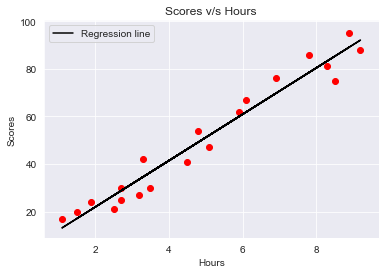

In [181]:
plt.plot(X_train,y, color='black')     #plots regression line in black color
plt.scatter(x_train,y_train, color='red') #plots original data
plt.legend(['Regression line'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores v/s Hours')

#### Finding result of new case

What will be the predicted score if a student studies for 9.25 hrs??

In [170]:
hours=9.25
predicted_score=reg.predict(np.array([hours]).reshape(-1,1))

In [183]:
list=[]
for i in np.round(predicted_score.astype(float),2):
    for j in i:
        list.append(j)
# evaluating output        
print(f'For {hours} Hours study the predicted marks scored will be {j}')

For 9.25 Hours study the predicted marks scored will be 92.55
